# LIDC-IDRI dataset
## Pruebas del código

In [1]:
import sys
import os
from pathlib import Path
import glob
from configparser import ConfigParser
import pandas as pd
import numpy as np
import warnings
import pylidc as pl
from tqdm import tqdm
from statistics import median_high

from utils import is_dir_path,segment_lung
from pylidc.utils import consensus
from PIL import Image

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 50

warnings.filterwarnings(action='ignore')

# Read the configuration file generated from config_file_create.py
parser = ConfigParser()
parser.read('lung.conf')

#Get Directory setting
DICOM_DIR = is_dir_path(parser.get('prepare_dataset','LIDC_DICOM_PATH'))
MASK_DIR = is_dir_path(parser.get('prepare_dataset','MASK_PATH'))
IMAGE_DIR = is_dir_path(parser.get('prepare_dataset','IMAGE_PATH'))
CLEAN_DIR_IMAGE = is_dir_path(parser.get('prepare_dataset','CLEAN_PATH_IMAGE'))
CLEAN_DIR_MASK = is_dir_path(parser.get('prepare_dataset','CLEAN_PATH_MASK'))
META_DIR = is_dir_path(parser.get('prepare_dataset','META_PATH'))

In [2]:
LIDC_IDRI_list= [f for f in os.listdir(DICOM_DIR) if not f.startswith('.')]
LIDC_IDRI_list.sort()

  0%|                                                     | 0/5 [00:00<?, ?it/s]

Loading dicom files ... This may take a moment.


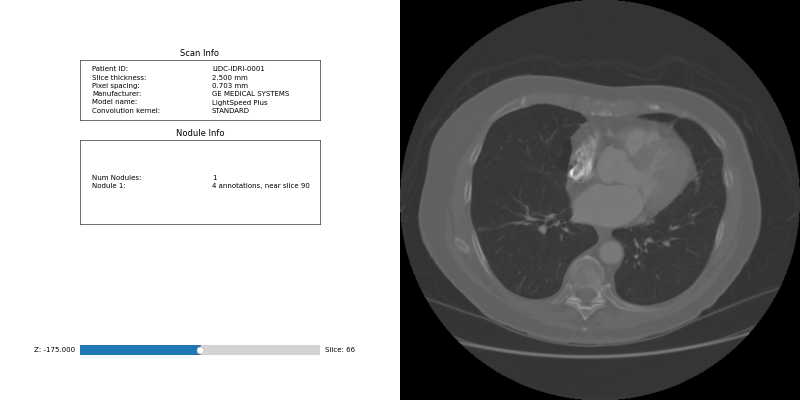

Loading dicom files ... This may take a moment.


 20%|█████████                                    | 1/5 [00:01<00:05,  1.34s/it]

Patient ID: LIDC-IDRI-0001 Dicom Shape: (512, 512, 133) Number of Annotated Nodules: 1
Loading dicom files ... This may take a moment.


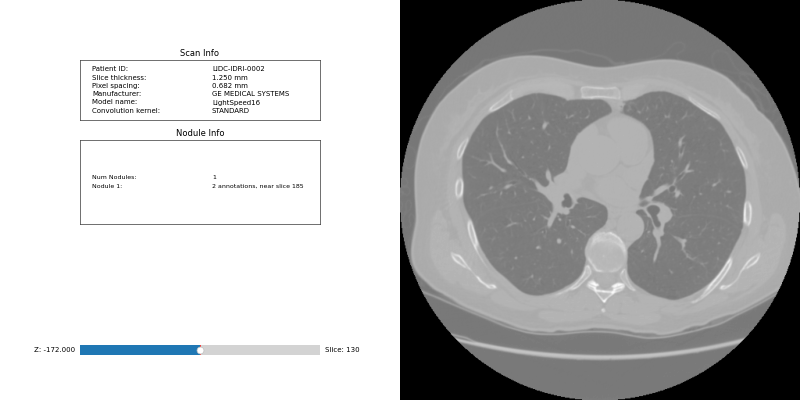

Loading dicom files ... This may take a moment.


 40%|██████████████████                           | 2/5 [00:03<00:04,  1.59s/it]

Patient ID: LIDC-IDRI-0002 Dicom Shape: (512, 512, 261) Number of Annotated Nodules: 1
Loading dicom files ... This may take a moment.


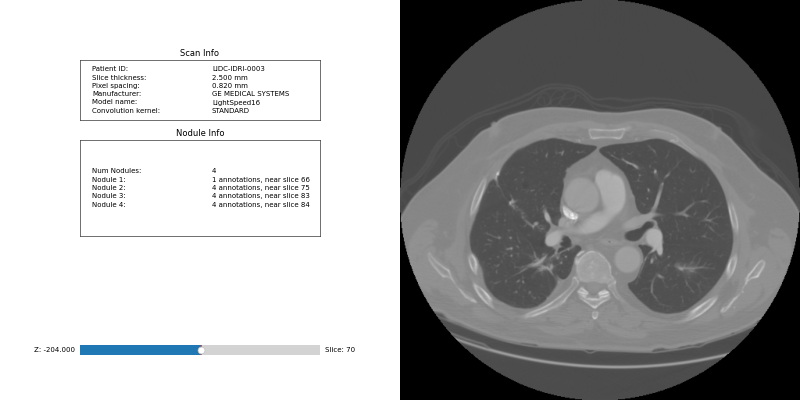

Loading dicom files ... This may take a moment.


 60%|███████████████████████████                  | 3/5 [00:05<00:03,  1.57s/it]

Patient ID: LIDC-IDRI-0003 Dicom Shape: (512, 512, 140) Number of Annotated Nodules: 4
Loading dicom files ... This may take a moment.


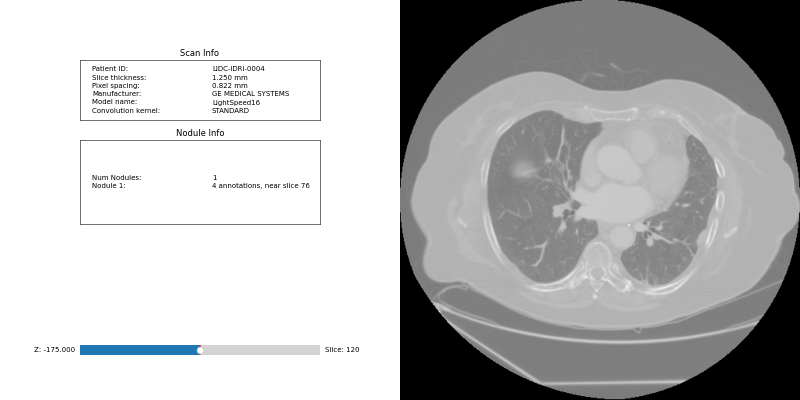

Loading dicom files ... This may take a moment.


 80%|████████████████████████████████████         | 4/5 [00:06<00:01,  1.67s/it]

Patient ID: LIDC-IDRI-0004 Dicom Shape: (512, 512, 241) Number of Annotated Nodules: 1
Loading dicom files ... This may take a moment.


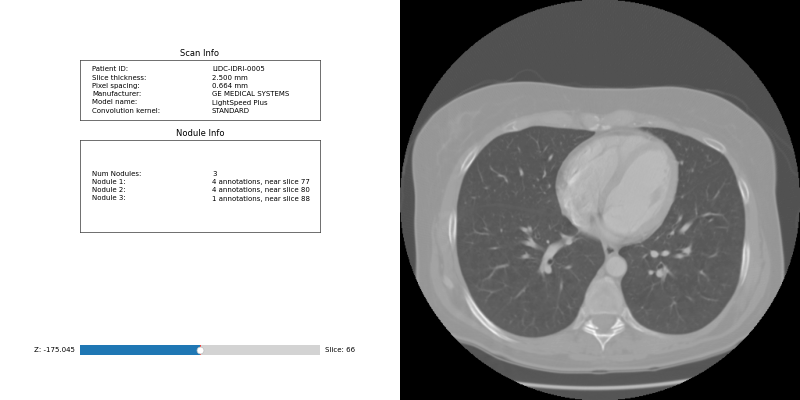

Loading dicom files ... This may take a moment.


100%|█████████████████████████████████████████████| 5/5 [00:08<00:00,  1.64s/it]

Patient ID: LIDC-IDRI-0005 Dicom Shape: (512, 512, 133) Number of Annotated Nodules: 3


In [3]:
for patient in tqdm(LIDC_IDRI_list):
    pid = patient #LIDC-IDRI-0001~
    scan = pl.query(pl.Scan).filter(pl.Scan.patient_id == pid).first()
    nodules_annotation = scan.cluster_annotations()
    %matplotlib ipympl
    annot=scan.visualize(annotation_groups=nodules_annotation)
    vol = scan.to_volume()
    print("Patient ID: {} Dicom Shape: {} Number of Annotated Nodules: {}".format(pid,
            vol.shape,len(nodules_annotation)))
    patient_image_dir = IMAGE_DIR+"/"+pid
    patient_mask_dir = MASK_DIR+"/"+pid